In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek
import warnings
warnings.filterwarnings("ignore")

In [2]:
churn=pd.read_csv(r'C:\Users\sandeep\Desktop\kajal\churn.csv')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
""" TotalCharge is numeric col however it is showing object type"""
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"],errors='coerce')

In [9]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
churn.shape

(7043, 21)

In [11]:
churn.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# handling categorical and numerical values

In [12]:
categorical_col = churn.select_dtypes(include = "object")
num_col = churn.select_dtypes(exclude = "object")

In [13]:
categorical_col.describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [14]:
churn.dropna(inplace = True) # dropped all missing Observations

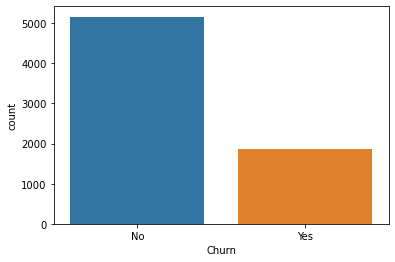

In [15]:
sns.countplot(churn["Churn"]);

In [16]:
# defining a function to plot distribution plot and box plot to see the distribution and outlier
def check_dis_outlier(x, variable):
    plt.figure(figsize =(10,6))
    plt.subplot(121)
    sns.distplot(x[variable])
    
    plt.subplot(122)
    sns.boxplot(x[variable])

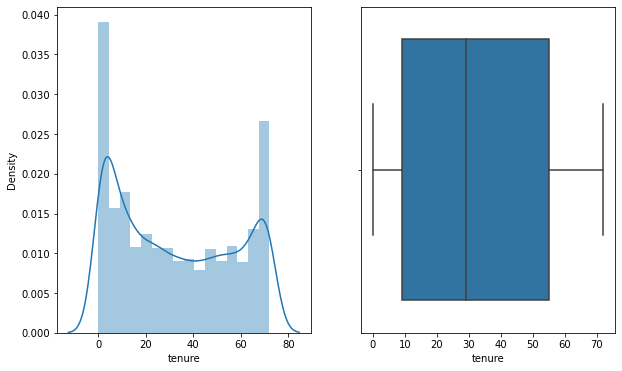

In [17]:
check_dis_outlier(num_col,"tenure")

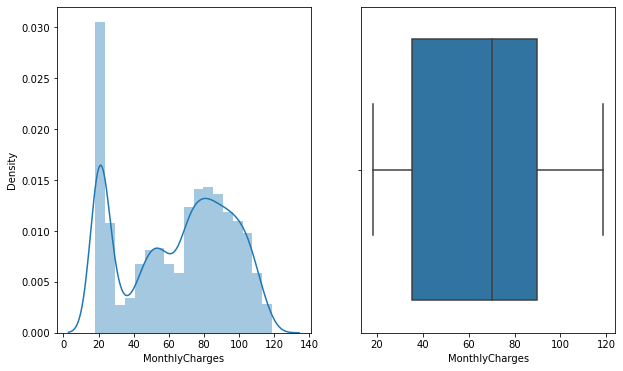

In [18]:
check_dis_outlier(num_col,"MonthlyCharges")

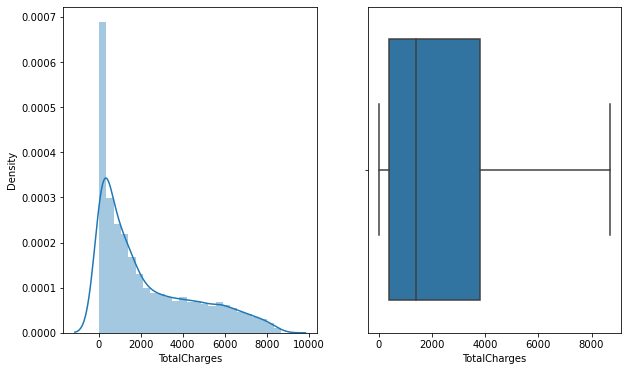

In [19]:
check_dis_outlier(num_col,"TotalCharges")

In [20]:
# Checking skewness in the numerical columns
num_col.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [21]:
churn["TotalCharges"] = np.cbrt(churn["TotalCharges"])
churn["TotalCharges"].skew()

0.012818570057014016

# EXPLINATARY DATA ANALYSIS

In [22]:
churn.groupby(["gender","Churn"])["Churn"].count()

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64

In [23]:
churn.groupby(["gender"]).mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
gender,,,,
Female,0.163078,32.290841,65.216652,11.365254
Male,0.161736,32.550296,64.387546,11.345427


<AxesSubplot:xlabel='PhoneService', ylabel='TotalCharges'>

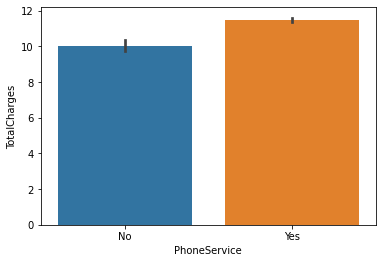

In [24]:
sns.barplot(x="PhoneService", y = "TotalCharges", data = churn)

In [25]:
pd.pivot_table(churn, values = "TotalCharges", index = ["PhoneService","MultipleLines"], aggfunc = "mean",columns = "Churn")

Churn                                 No        Yes
PhoneService MultipleLines                         
No           No phone service  11.004291   7.122934
Yes          No                 9.867530   7.429445
             Yes               14.900716  11.941814

In [26]:
 pd.pivot_table(churn, values = "TotalCharges", index = ["PhoneService","InternetService"], aggfunc = "mean",columns = "Churn")

Churn                                No        Yes
PhoneService InternetService                      
No           DSL              11.004291   7.122934
Yes          DSL              12.601154   7.561011
             Fiber optic      15.027279  10.621011
             No                8.031932   4.403161

In [28]:
 pd.pivot_table(churn, values = "TotalCharges", index = ["OnlineSecurity","OnlineBackup"], aggfunc = "count",columns ="Churn")

Churn                                      No   Yes
OnlineSecurity      OnlineBackup                   
No                  No                   1138  1057
                    Yes                   898   404
No internet service No internet service  1407   113
Yes                 No                    716   176
                    Yes                  1004   119

In [29]:
pd.pivot_table(churn, values = "TotalCharges", index = ["TechSupport"], aggfunc = "count",columns = "Churn")

Churn,No,Yes
TechSupport,,
No,2026,1446
No internet service,1407,113
Yes,1730,310


In [30]:
pd.pivot_table(churn, values = "TotalCharges", index = ["Contract"], aggfunc = "count",columns = "Churn")

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


In [31]:
pd.pivot_table(churn, values = "TotalCharges", index = ["Contract","PaperlessBilling"], aggfunc = "count",columns = "Churn")

Churn                              No   Yes
Contract       PaperlessBilling            
Month-to-month No                 883   406
               Yes               1337  1249
One year       No                 625    48
               Yes                681   118
Two year       No                 887    15
               Yes                750    33

In [32]:
pd.pivot_table(churn, values = "TotalCharges", index = ["PaymentMethod"], aggfunc = "count",columns = "Churn")

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


<AxesSubplot:xlabel='Churn', ylabel='tenure'>

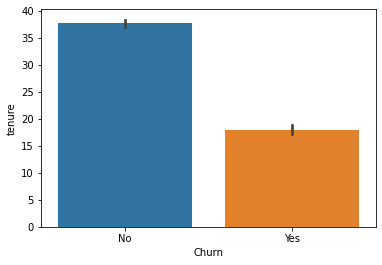

In [33]:
sns.barplot(x = "Churn", y = "tenure", data = churn)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

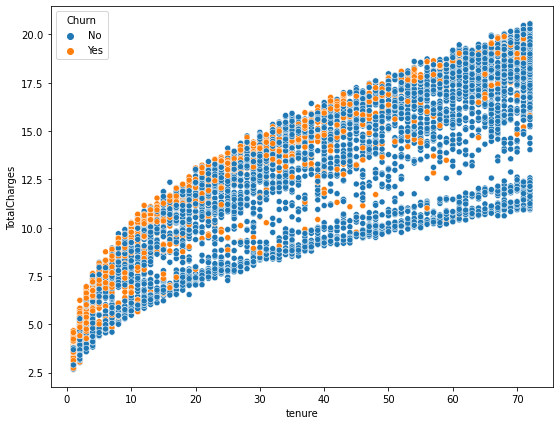

In [34]:
plt.figure(figsize =(9,7))
sns.scatterplot(x ="tenure",y = "TotalCharges", data = churn, hue = "Churn")

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

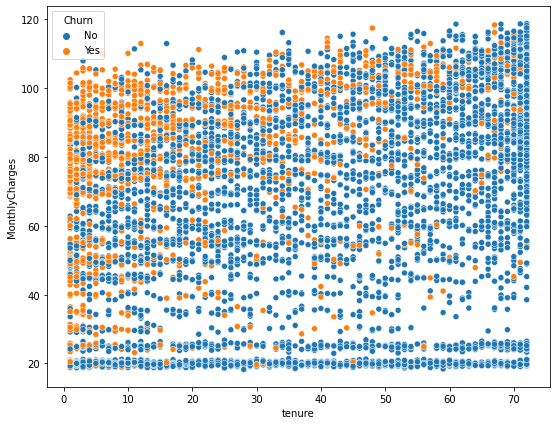

In [35]:
plt.figure(figsize =(9,7))
sns.scatterplot(x ="tenure",y = "MonthlyCharges", data = churn, hue = "Churn")

In [37]:
# Deleting the ID columns
churn.drop("customerID",axis =1, inplace = True)

# Since maximum columns are categorical, lets transform them with LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
churn["gender"] = le.fit_transform(churn["gender"])
churn["Partner"] = le.fit_transform(churn["Partner"])
churn["Dependents"] = le.fit_transform(churn["Dependents"])
churn["PhoneService"] = le.fit_transform(churn["PhoneService"])
churn["MultipleLines"] = le.fit_transform(churn["MultipleLines"])
churn["InternetService"] = le.fit_transform(churn["InternetService"])
churn["OnlineSecurity"] = le.fit_transform(churn["OnlineSecurity"])
churn["DeviceProtection"] = le.fit_transform(churn["DeviceProtection"])
churn["TechSupport"] = le.fit_transform(churn["TechSupport"])
churn["StreamingTV"] = le.fit_transform(churn["StreamingTV"])
churn["StreamingMovies"] = le.fit_transform(churn["StreamingMovies"])
churn["Contract"] = le.fit_transform(churn["Contract"])
churn["OnlineBackup"] = le.fit_transform(churn["OnlineBackup"])
churn["PaperlessBilling"] = le.fit_transform(churn["PaperlessBilling"])
churn["PaymentMethod"] = le.fit_transform(churn["PaymentMethod"])
churn["Churn"] = le.fit_transform(churn["Churn"])

In [38]:
churn.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

<AxesSubplot:>

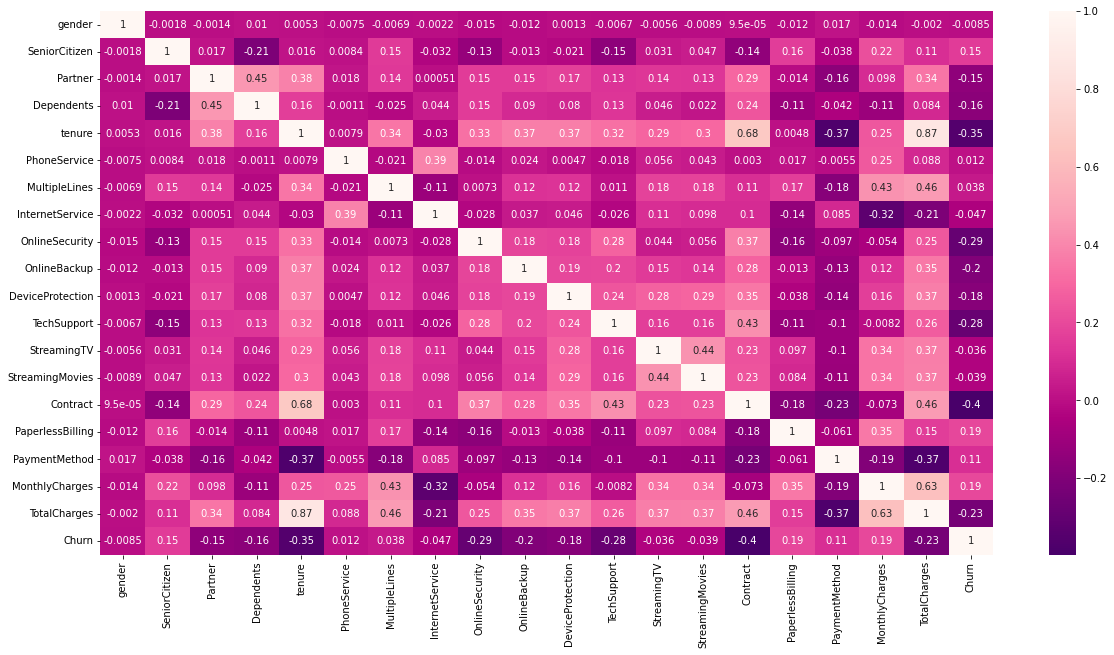

In [41]:
plt.figure(figsize =(20,10))
sns.heatmap(churn.corr(),annot = True, cmap ="RdPu_r")

# MODELLING

In [42]:
X=churn.drop("Churn",axis=1)
y=churn["Churn"]

In [43]:
for i in range(50,350,40):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2, random_state =i)
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    pred = LR.predict(X_test)
    print("Accuracy",accuracy_score(y_test,pred),i)
    print("ROC_AUC_score",roc_auc_score(y_test,pred))
    print("classification_report","\n",classification_report(y_test,pred))
    print("confusion_matrix","\n",confusion_matrix(y_test,pred))

Accuracy 0.8159203980099502 50
ROC_AUC_score 0.7272312852072548
classification_report 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1059
           1       0.65      0.55      0.60       348

    accuracy                           0.82      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407

confusion_matrix 
 [[956 103]
 [156 192]]
Accuracy 0.8109452736318408 90
ROC_AUC_score 0.7158919641478183
classification_report 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1049
           1       0.66      0.52      0.58       358

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407

confusion_matrix 
 [[954  95]
 [171 187]]
Accuracy 0.814498933901919 130
ROC_AUC_score 0.7270383846666325
classification_report 

In [44]:
model = [RandomForestClassifier(), AdaBoostClassifier(),GradientBoostingClassifier(), DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

for i in model:
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2, random_state = 130)
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print("Accuracy",accuracy_score(y_test,pred),i)
    print("ROC_AUC_score",roc_auc_score(y_test,pred))
    print("classification_report","\n",classification_report(y_test,pred))
    print("confusion_matrix","\n",confusion_matrix(y_test,pred))

Accuracy 0.7917555081734187 RandomForestClassifier()
ROC_AUC_score 0.6915645979603341
classification_report 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1027
           1       0.66      0.47      0.55       380

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

confusion_matrix 
 [[934  93]
 [200 180]]
Accuracy 0.8009950248756219 AdaBoostClassifier()
ROC_AUC_score 0.7128145339004767
classification_report 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1027
           1       0.67      0.52      0.59       380

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407

confusion_matrix 
 [[929  98]
 [182 198]]
Accuracy 0.806680881307747 GradientBoostingCla

# GRID CV

In [ ]:
RF = RandomForestClassifier()
parameter = {"n_estimators" :[100,150,250,300],
            "max_depth":[3,4,5,6],
             "max_features" : ["auto", "sqrt", "log2"],
              "criterion" :['gini', "entropy"]
            }

grid_score = GridSearchCV(RF, parameter,cv = 5,scoring = "roc_auc", n_jobs =-1, verbose =2)
grid_score.fit(X_train,y_train)
print(grid_score.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


# CROSS VALIDATION

In [ ]:
best_para_RF = RandomForestClassifier(criterion = "entropy",max_depth = 6,max_features = "auto",n_estimators = 100)

for i in range(2,11):
    cross_score = cross_val_score(best_para_RF, X,y, cv = i, n_jobs=-1)
    print(i,"mean",cross_score.mean(), "and std", cross_score.std()) 

# SAVE THE MODEL

In [ ]:
import pickle 
best_para_RF.fit(X,y)

filename = "customer_churn_prediction.pkl"

with open(filename, "wb") as f:
    pickle.dump(best_para_RF,f)